In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib widget
from kjm2601 import obsidian_media_path as path

In [2]:
def make_psi(x, sigma = 2.0, k = 0.0, x0 = 0.0):
    return np.exp(-0.5*((x-x0)/sigma)**2)*np.exp(1j*k*x)



In [5]:
x = np.linspace(-10,10,1000)
dx = x[1]-x[0]
psi1 = make_psi(x, sigma = 2.0, k = 0.0, x0 = -2.0)
psi2 = make_psi(x, sigma = 3.0, k = 3.0, x0 = 0.0)
psi = psi1 + 2 * psi2
psi = psi/(dx**.5*np.linalg.norm(psi))

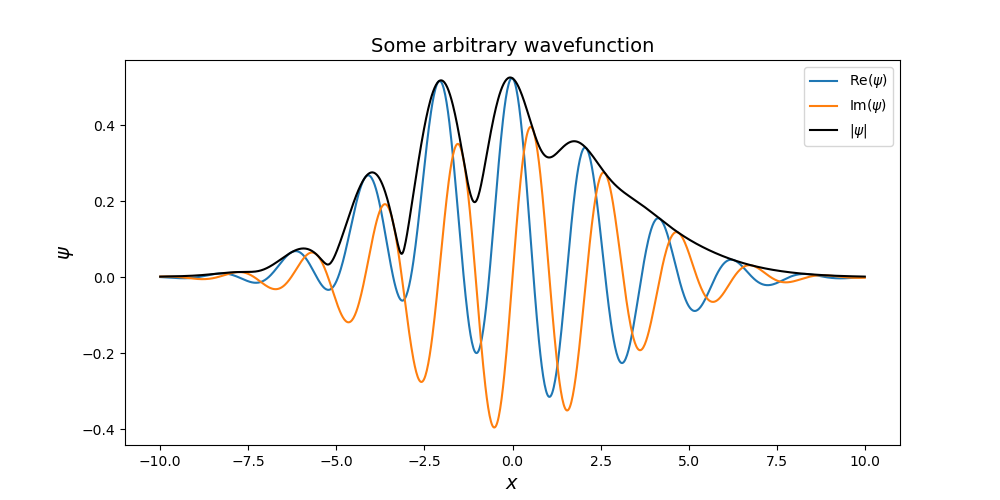

In [25]:
plt.figure(figsize=(10,5))
plt.plot(x, np.real(psi), label='Re($\psi$)')
plt.plot(x, np.imag(psi), label='Im($\psi$)')
plt.plot(x, np.abs(psi), color = 'k', label='|$\psi$|')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$\psi$', fontsize=14)
plt.title('Some arbitrary wavefunction', fontsize=14)
plt.legend()
plt.savefig(path + 'measurement_arbitrary_wavefunction.pdf')
plt.show()


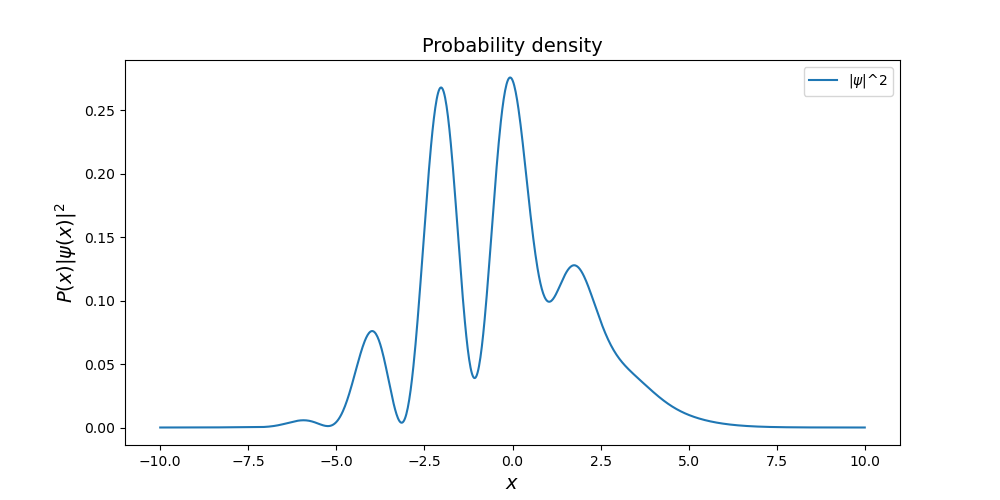

In [24]:
plt.figure(figsize=(10,5))
plt.plot(x, np.abs(psi)**2, label='|$\psi$|^2')
plt.legend()
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$P(x)|\psi(x)|^2$', fontsize=14)
plt.title('Probability density', fontsize=14)
plt.savefig(path + 'measurement_probability_density.pdf')
plt.show()

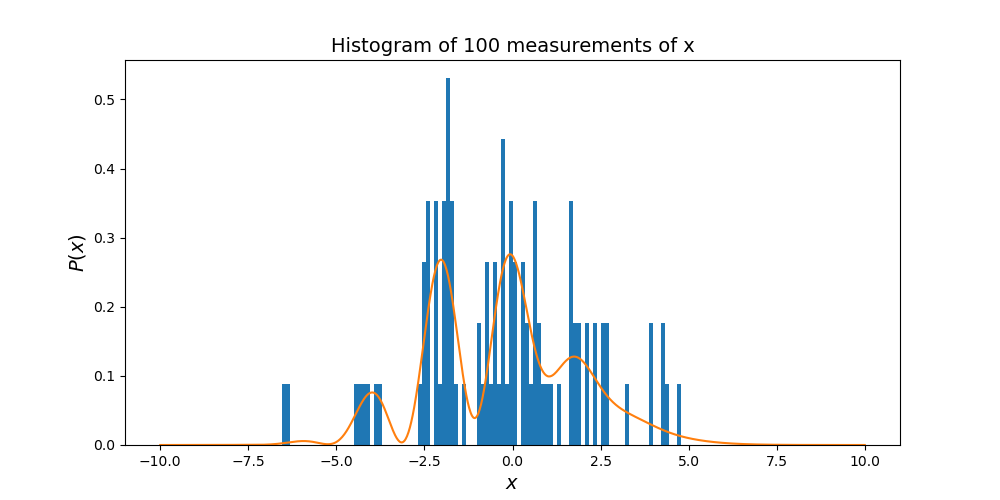

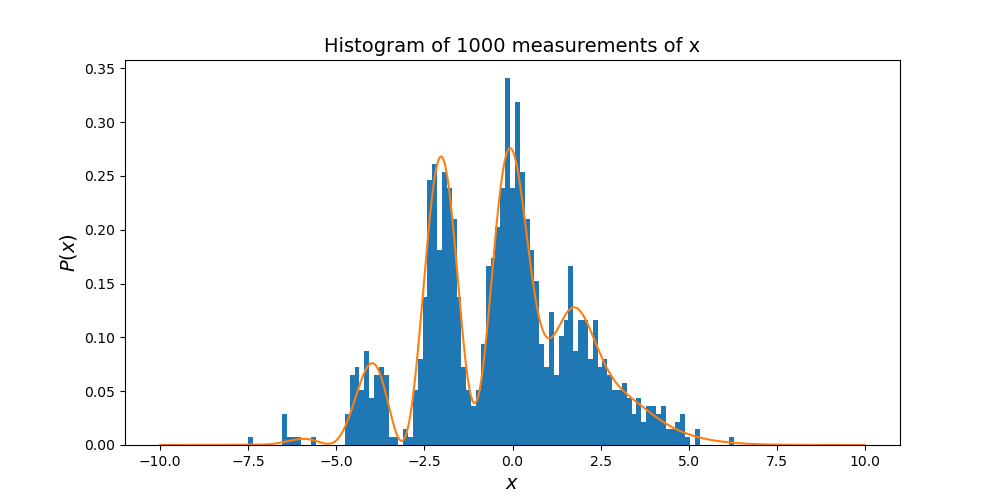

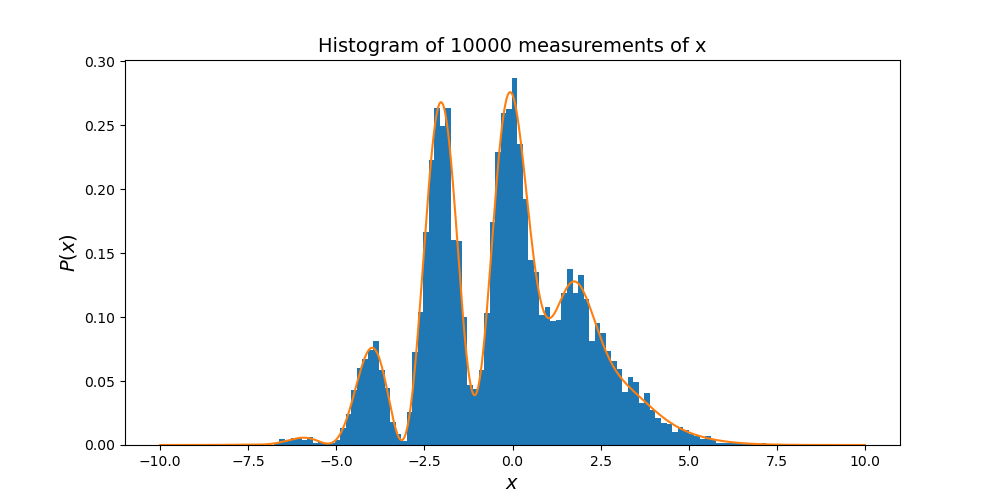

In [23]:
P = np.abs(psi)**2

samples = 10000
x_samples = np.random.choice(x, size=samples, p=P/np.sum(P))
for n in [100, 1000, 10000]:
    
    plt.figure(figsize=(10,5))
    plt.hist(x_samples[:n], bins=100, density=True)
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$P(x)$', fontsize=14)
    plt.title(f'Histogram of {n} measurements of x', fontsize=14)
    
    plt.plot(x, P)
    plt.savefig(path + f'measurement_histogram_{n}.pdf')
    plt.show()


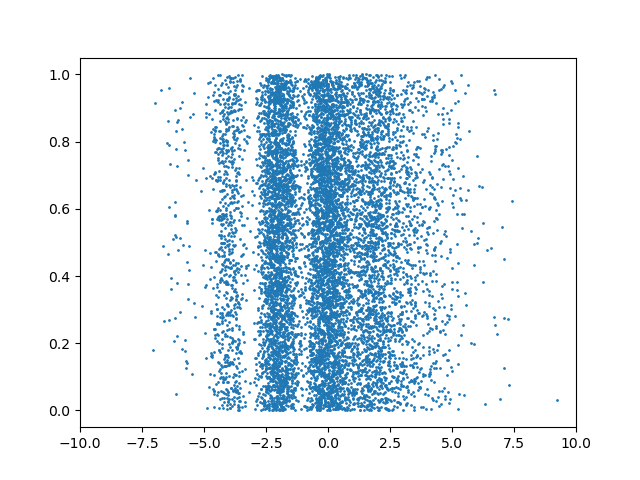

In [17]:
plt.figure()
y = np.random.rand(samples)
plt.scatter(x_samples, y, s=1)
plt.xlim(-10,10)
plt.show()
